In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datasets/cleanedAdvanced/overall-teams-data.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df

,Player,Age,Tkl,TacklesDef3rd,TacklesMid3rd,TacklesAtt3rd,VSDribblesTkl,VSDribblesAtt,VSDribblesTkl%,VSDribblesPast,...,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef,Points Total
0,Wolves S2,26.6,646,358,227,61,281,685,41.0,404,...,18,83,2.18,53,6,9,8,7,0,59
1,Newcastle S2,26.9,711,356,291,64,241,565,42.7,324,...,18,68,1.79,46,5,4,10,2,1,45
2,Brighton S2,27.4,679,363,238,78,264,582,45.4,318,...,12,55,1.45,29,9,1,7,8,1,36
3,Huddersfield S2,26.2,708,323,315,70,263,625,42.1,362,...,14,33,0.87,23,4,0,3,3,0,16
4,Sheffield Utd S2,26.7,634,325,239,70,294,720,40.8,426,...,5,27,0.71,16,3,2,3,3,0,23
5,Aston Villa S2,25.2,530,262,202,66,250,571,43.8,321,...,12,94,2.47,66,8,4,6,9,1,55
6,Leeds United S2,26.1,786,395,298,93,408,886,46.0,478,...,14,66,1.74,36,2,10,10,5,3,38
7,Wolves S1,26.1,720,385,284,51,283,664,42.6,381,...,13,83,2.18,58,6,5,6,8,0,57
8,Newcastle S1,25.6,645,338,255,52,221,638,34.6,417,...,20,63,1.66,43,7,2,10,1,0,44
9,Brighton S1,27.5,599,360,205,34,205,642,31.9,437,...,8,60,1.58,43,3,4,4,6,0,40


In [4]:
finaldf = df.drop(columns = ['Player'])

<AxesSubplot:>

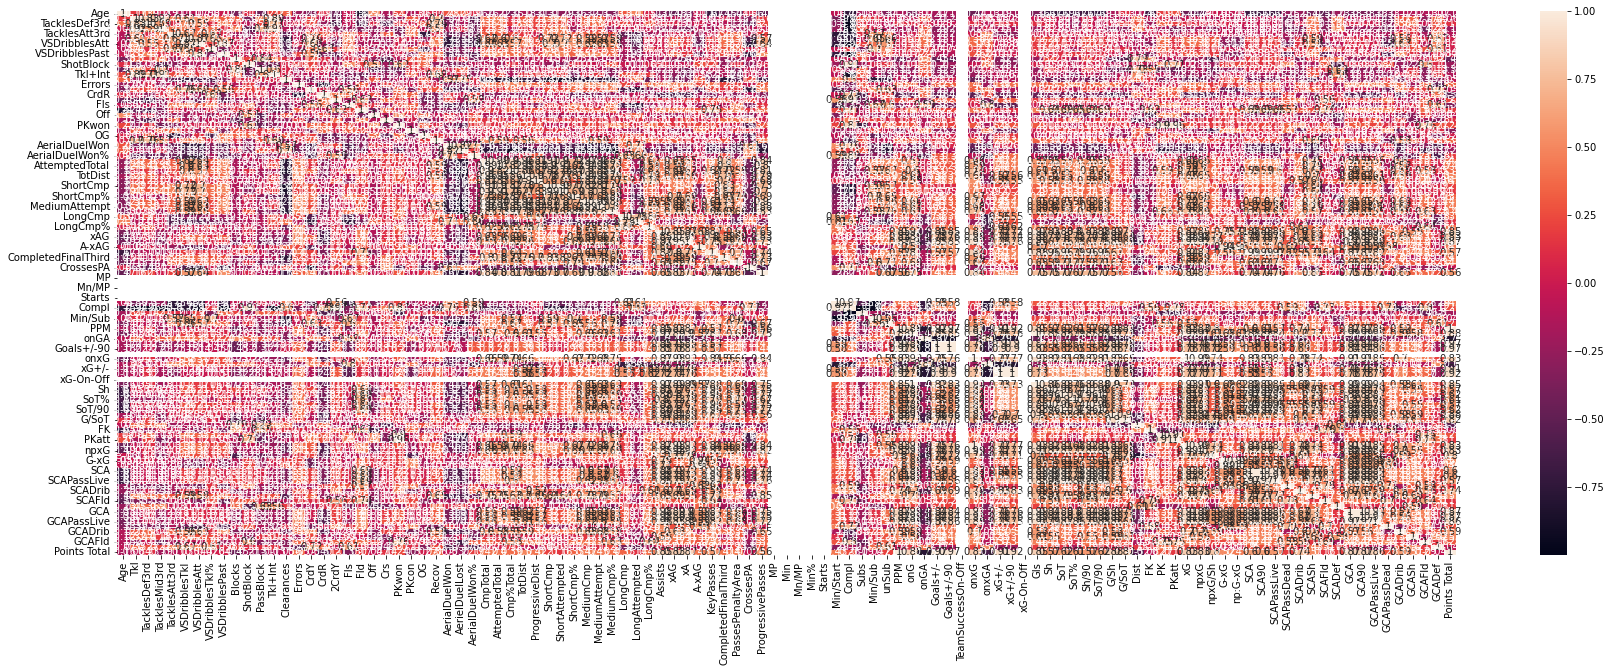

In [10]:
corr = finaldf.corr()

import seaborn as sns
plt.figure(figsize = (30,10))
sns.heatmap(corr, annot = True)

In [16]:
points_corrs = corr.tail(1)
points_corrs

,Age,Tkl,TacklesDef3rd,TacklesMid3rd,TacklesAtt3rd,VSDribblesTkl,VSDribblesAtt,VSDribblesTkl%,VSDribblesPast,Blocks,...,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef,Points Total
Points Total,-0.160475,-0.063521,0.12871,-0.189309,-0.111122,0.035244,0.044179,0.025685,0.041418,-0.445147,...,0.190176,0.870375,0.870348,0.858733,0.2772,0.589984,0.506864,0.28507,-0.042788,1.0


In [24]:
points_corrs = points_corrs.dropna(axis=1,how='all')
points_corrs = points_corrs.sort_values(points_corrs.last_valid_index(), axis=1)
points_corrs

,onGA,onxGA,Dist,CrdR,Blocks,Fls,PassBlock,PKcon,AerielDuelLost,ShotBlock,...,GCA90,GCA,onG,G/Sh,xG+/-,xG+/-90,Goals+/-,Goals+/-90,PPM,Points Total
Points Total,-0.782106,-0.598821,-0.52456,-0.510742,-0.445147,-0.348084,-0.308008,-0.295075,-0.220925,-0.212812,...,0.870348,0.870375,0.877483,0.880675,0.914711,0.915286,0.965131,0.965422,0.999973,1.0


In [28]:
top30_pos = points_corrs.iloc[-30:, -30:]
top20_neg = points_corrs.iloc[:20, :20]
top20_neg

,onGA,onxGA,Dist,CrdR,Blocks,Fls,PassBlock,PKcon,AerielDuelLost,ShotBlock,TacklesMid3rd,Subs,Age,Tkl+Int,TacklesAtt3rd,Tkl,FK,Clearances,CrdY,AerialDuelWon
Points Total,-0.782106,-0.598821,-0.52456,-0.510742,-0.445147,-0.348084,-0.308008,-0.295075,-0.220925,-0.212812,-0.189309,-0.188592,-0.160475,-0.126275,-0.111122,-0.063521,-0.062327,-0.056062,-0.054373,-0.052917
